In [1]:
%pylab inline
%matplotlib notebook
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


# Potencial Henón - Heiles 

$
V\left(x,y\right)=\frac{1}{2}\left (x^{2} + y^{2} \right) + \left (x^{2}y - \frac{1}{3}y^{3} \right)
$

In [2]:
#Función de potencial Henón - Heiles
def V(x,y):
    return 0.5*(x**2 + y**2 + 2*y*(x**2) - (2.0/3.0)*(y**3))

# Ecuaciones de movimiento

$p_{x}=\dot{x}$

$p_{y}=\dot{y}$

$\dot{P_{x}} = -\frac{\partial H}{\partial x} = \ddot{x} = - x - 2xy$

$ \dot{P_{y}} = -\frac{\partial H}{\partial x} = \ddot{y} =  -y - x^{2} + y^{2}$

In [3]:
def ecuaciones(x,t):
    #Estado actual
    xi =  x[0]
    yi =  x[1]
    pxi = x[2]
    pyi = x[3]
    
    #Ecuaciones de movimiento
    EM0 = pxi
    EM1 = pyi
    EM2 = -xi -2*xi*yi
    EM3 = -yi + yi**2 - xi**2
    return [EM0, EM1, EM2, EM3]

In [4]:
def orbita(x0,y0,py0,E,dT,T_max):
    #Por lo explicado en el articulo solo se utilizan energias menores o iguales a 1/6
    if E > (1/6):
        print("Escoja una energia menor a 1/6")
        return

    V0 = V(x0,y0) #Potencial en el punto inicial
    px0 = sqrt(2*(E - V0) - py0**2) #Valor inical de momento en x (px)
    X0 = [x0,y0,px0,py0] #Vector de estado inicla
    tiempo = linspace(0,T_max,int(T_max/dT)) #Genera el numero de pasos de tiempo

    # Solucion con ODE:
    Sol = odeint(ecuaciones, X0, tiempo)

    return Sol

In [5]:
def graph2D(Sol):
    plt.figure()
    plt.plot(Sol[:,0],Sol[:,1],linewidth=0.1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [6]:
def graph3D(Sol):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cset = ax.plot(Sol[:,1],Sol[:,0],Sol[:,3],linewidth=0.1)
    ax.clabel(cset, fontsize=9, inline=1)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_zlabel('Py')

<IPython.core.display.Javascript object>


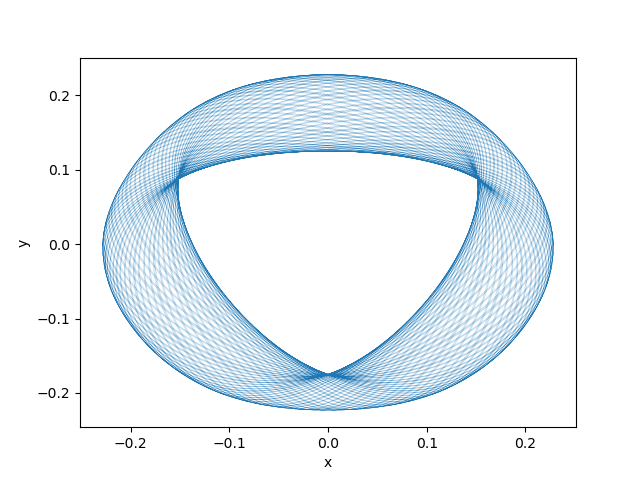

<IPython.core.display.Javascript object>


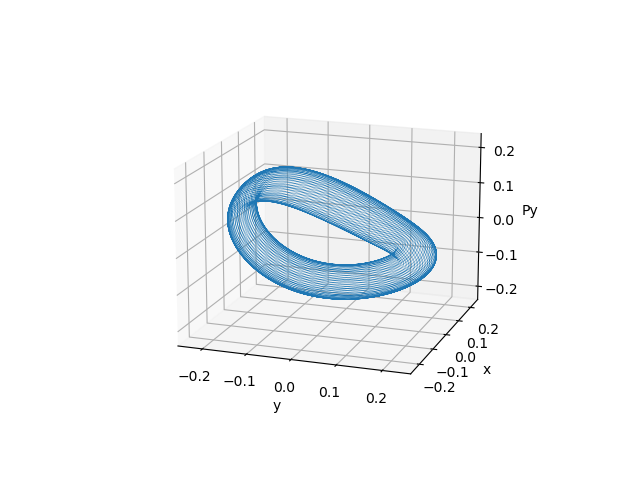

In [7]:
#Numero de puntos y el salto de tiempo se escogio en pro de mejorar el aspecto visual
#Se generan mapas de Poincare para las energias 1/6,1/8,1/12,1/24,1/26.5
Sol265 = orbita(0,0.128846,0.018450,1/26.5,0.02,1000)
graph2D(Sol265)
graph3D(Sol265)

<IPython.core.display.Javascript object>


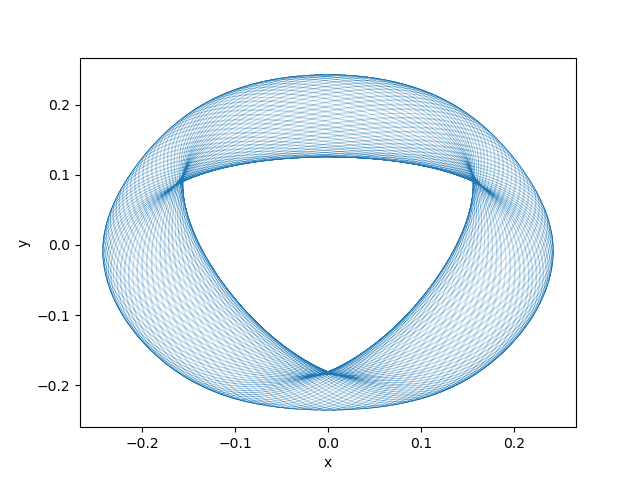

<IPython.core.display.Javascript object>


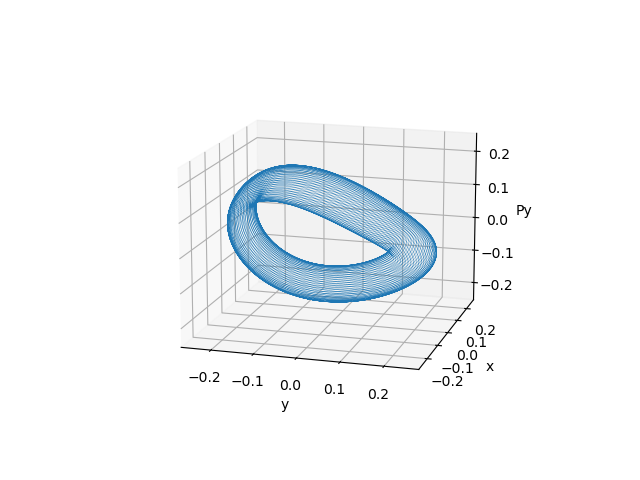

In [8]:
Sol24 = orbita(0,0.128846,0.018450,1/24,0.02,1000)
graph2D(Sol24)
graph3D(Sol24)

<IPython.core.display.Javascript object>


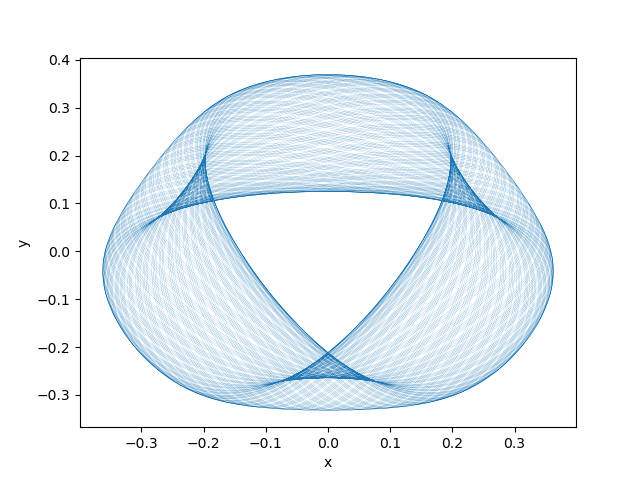

<IPython.core.display.Javascript object>


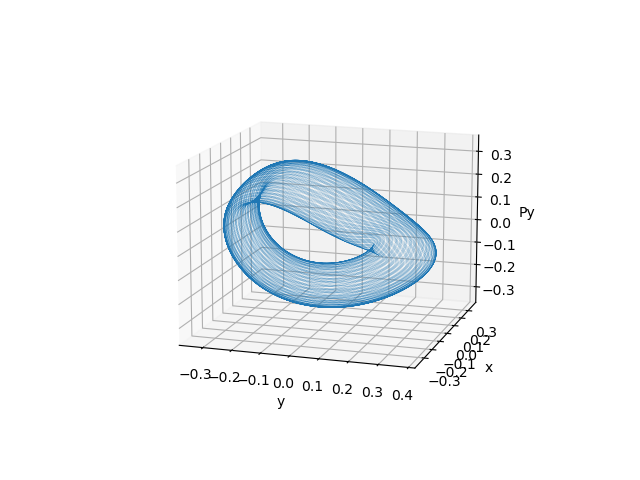

In [10]:
Sol12 = orbita(0,0.128846,0.018450,1/12,0.02,1000)
graph2D(Sol12)
graph3D(Sol12)

<IPython.core.display.Javascript object>


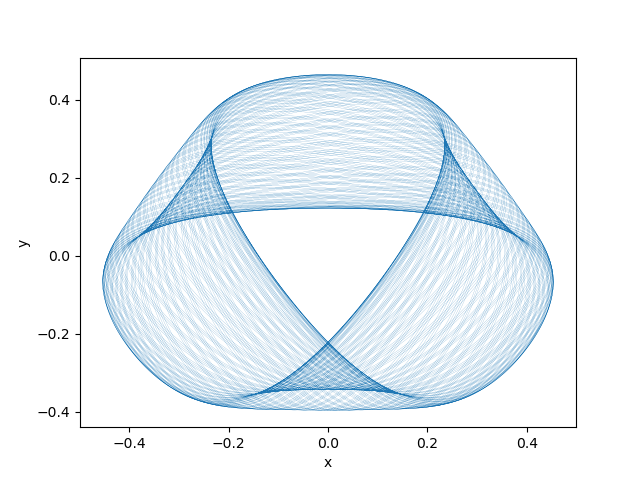

<IPython.core.display.Javascript object>


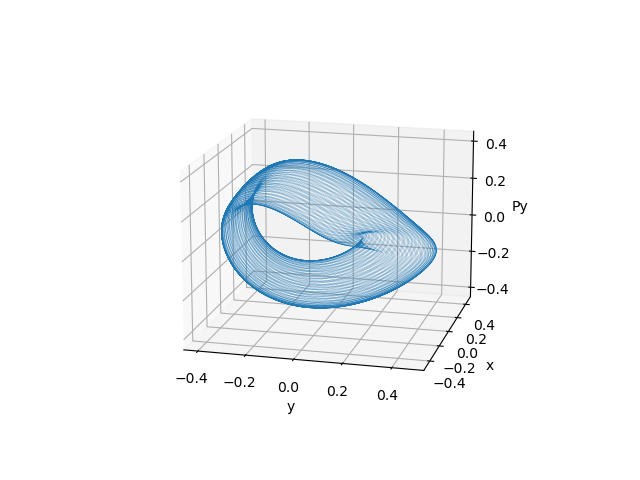

In [11]:
Sol8 = orbita(0,0.128846,0.018450,1/8,0.02,1000)
graph2D(Sol8)
graph3D(Sol8)

<IPython.core.display.Javascript object>


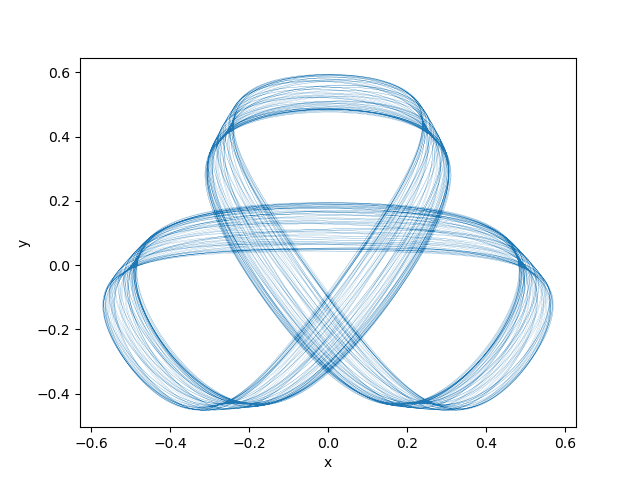

<IPython.core.display.Javascript object>


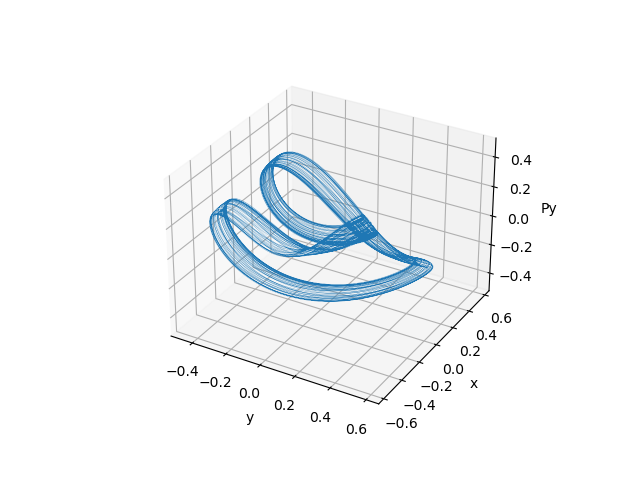

In [13]:
Sol6 = orbita(0,0.128846,0.018450,1/6,0.02,1000)
graph2D(Sol6)
graph3D(Sol6)